In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [380]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [381]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [382]:
filtered_df = df[df['Department'] == 'Research & Development']['DistanceFromHome']
filtered_df 

1        8
2        2
3        3
4        2
5        2
        ..
1463     5
1465    23
1466     6
1467     4
1469     8
Name: DistanceFromHome, Length: 961, dtype: int64

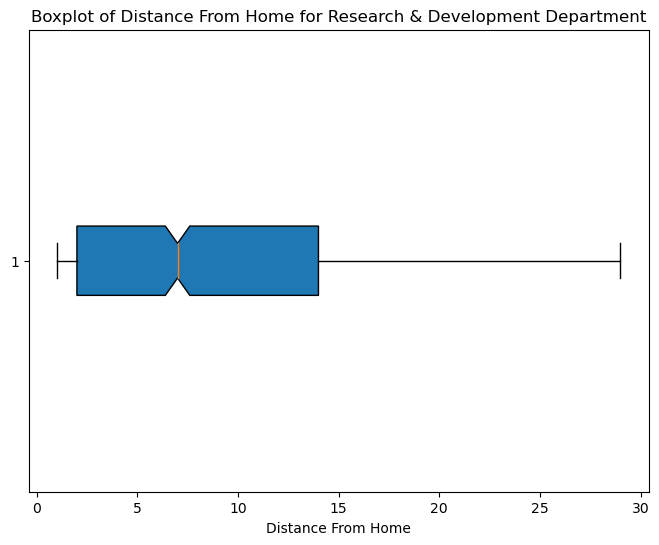

In [383]:
# Plotting a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df.values, patch_artist=True, notch=True, vert=False)

# Adding title and labels
plt.title('Boxplot of Distance From Home for Research & Development Department')
plt.xlabel('Distance From Home')

# Display the plot
plt.show()

In [384]:
frequency_counts = filtered_df.value_counts().sort_index()

print("Frequency counts for distancefromhome:")
print(frequency_counts)

Frequency counts for distancefromhome:
DistanceFromHome
1     147
2     133
3      52
4      40
5      42
6      44
7      59
8      47
9      57
10     49
11     19
12     13
13      8
14     14
15     20
16     20
17     15
18     19
19     16
20     15
21     10
22     12
23     21
24     20
25     19
26      8
27      8
28     15
29     19
Name: count, dtype: int64


In [385]:
bins = range(0, filtered_df.max() + 6, 5)  # define bins from 0 to maximum + 5, increment of 5
frequency_counts = pd.cut(filtered_df, bins=bins, right=False).value_counts().sort_index()

print("Frequency counts for distancefromhome bins (every 5 km):")
print(frequency_counts)

Frequency counts for distancefromhome bins (every 5 km):
DistanceFromHome
[0, 5)      372
[5, 10)     249
[10, 15)    103
[15, 20)     90
[20, 25)     78
[25, 30)     69
Name: count, dtype: int64


In [386]:
W1 = 0.5
W2 = 0.3
W3 = 0.2
df["Performance"] = W1*df["PercentSalaryHike"]+W1*df["PerformanceRating"]
df["Performance"]

0        7.0
1       13.5
2        9.0
3        7.0
4        7.5
        ... 
1465    10.0
1466     9.0
1467    12.0
1468     8.5
1469     7.5
Name: Performance, Length: 1470, dtype: float64

In [387]:
# Step 1: Bin distancefromhome into tiers
bins = range(0, df['DistanceFromHome'].max() + 6, 5)  # bins every 5 km
df['bin'] = pd.cut(df['DistanceFromHome'], bins=bins, right=False, labels=False)

In [388]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,bin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,7.0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,13.5,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,9.0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,7.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,7.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,1,17,3,3,5,2,0,3,10.0,4
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,9,5,3,7,7,1,7,9.0,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,1,6,0,3,6,2,0,3,12.0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,17,3,2,9,6,0,8,8.5,0


In [389]:
#increase per $1 grant half across bins from bin 5 to 0 with bin 5 at 0.01

factor_list = []
current = 0.01

for _ in range(6):
    factor_list.append(current)
    current /= 2

factor_list.reverse()
print(factor_list)


[0.0003125, 0.000625, 0.00125, 0.0025, 0.005, 0.01]


In [390]:
df_sorted = df.sort_values(by='Performance', ascending=False)
df_sorted

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,bin
676,35,No,Travel_Rarely,1137,Research & Development,21,1,Life Sciences,1,942,...,1,10,2,1,10,6,0,7,14.5,4
251,39,No,Travel_Frequently,505,Research & Development,2,4,Technical Degree,1,343,...,0,20,1,3,19,6,11,8,14.5,0
1087,34,No,Travel_Rarely,1440,Sales,7,2,Technical Degree,1,1541,...,1,12,4,3,11,10,5,7,14.5,1
853,19,No,Travel_Rarely,645,Research & Development,9,2,Life Sciences,1,1193,...,0,1,4,3,1,1,0,0,14.5,1
281,42,No,Travel_Rarely,635,Sales,1,1,Life Sciences,1,387,...,0,20,3,3,20,16,11,6,14.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,29,Yes,Travel_Rarely,805,Research & Development,1,2,Life Sciences,1,816,...,1,1,1,3,1,0,0,0,7.0,0
1272,38,No,Travel_Rarely,1153,Research & Development,6,2,Other,1,1782,...,1,5,3,3,5,4,0,4,7.0,1
586,24,No,Non-Travel,1092,Research & Development,9,3,Life Sciences,1,812,...,3,1,4,3,1,0,0,0,7.0,1
579,34,No,Travel_Rarely,121,Research & Development,2,4,Medical,1,804,...,0,6,3,3,6,5,1,3,7.0,0


In [391]:
df['Factor'] = df['bin'].apply(lambda x: factor_list[x])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,bin,Factor
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,7.0,0,0.000313
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,13.5,1,0.000625
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,9.0,0,0.000313
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,7.0,0,0.000313
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,7.5,0,0.000313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,10.0,4,0.005000
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,9.0,1,0.000625
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,12.0,0,0.000313
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,8.5,0,0.000313


In [392]:
df['New_Performance'] = df['Performance']
df['Dollars_given'] = 0

In [393]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,bin,Factor,New_Performance,Dollars_given
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,6,4,0,5,7.0,0,0.000313,7.0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,10,7,1,7,13.5,1,0.000625,13.5,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,0,0,0,0,9.0,0,0.000313,9.0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,8,7,3,0,7.0,0,0.000313,7.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,2,2,2,2,7.5,0,0.000313,7.5,0


In [394]:
df['PerformXFactor'] = df['Performance'] * df['Factor']

In [395]:
df = df[['Performance', 'bin', 'Factor', 'New_Performance', 'PerformXFactor', 'Dollars_given']]
df.head()

,Performance,bin,Factor,New_Performance,PerformXFactor,Dollars_given
0,7.0,0,0.000313,7.0,0.002188,0
1,13.5,1,0.000625,13.5,0.008438,0
2,9.0,0,0.000313,9.0,0.002812,0
3,7.0,0,0.000313,7.0,0.002188,0
4,7.5,0,0.000313,7.5,0.002344,0


In [396]:
#Constraints
cap = 3
budget = 9000

In [397]:
info_arr = df.to_dict('records')
info_arr

[{'Performance': 7.0,
  'bin': 0,
  'Factor': 0.0003125,
  'New_Performance': 7.0,
  'PerformXFactor': 0.0021875,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 1,
  'Factor': 0.000625,
  'New_Performance': 13.5,
  'PerformXFactor': 0.0084375,
  'Dollars_given': 0},
 {'Performance': 9.0,
  'bin': 0,
  'Factor': 0.0003125,
  'New_Performance': 9.0,
  'PerformXFactor': 0.0028125,
  'Dollars_given': 0},
 {'Performance': 7.0,
  'bin': 0,
  'Factor': 0.0003125,
  'New_Performance': 7.0,
  'PerformXFactor': 0.0021875,
  'Dollars_given': 0},
 {'Performance': 7.5,
  'bin': 0,
  'Factor': 0.0003125,
  'New_Performance': 7.5,
  'PerformXFactor': 0.00234375,
  'Dollars_given': 0},
 {'Performance': 8.0,
  'bin': 0,
  'Factor': 0.0003125,
  'New_Performance': 8.0,
  'PerformXFactor': 0.0025,
  'Dollars_given': 0},
 {'Performance': 12.0,
  'bin': 0,
  'Factor': 0.0003125,
  'New_Performance': 12.0,
  'PerformXFactor': 0.00375,
  'Dollars_given': 0},
 {'Performance': 13.0,
  'bin': 4,
  'Fact

In [398]:
sorted_info_arr = sorted(info_arr, key=lambda x: x['PerformXFactor'], reverse=True)
sorted_info_arr

[{'Performance': 14.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 14.5,
  'PerformXFactor': 0.145,
  'Dollars_given': 0},
 {'Performance': 14.0,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 14.0,
  'PerformXFactor': 0.14,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 13.5,
  'PerformXFactor': 0.135,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 13.5,
  'PerformXFactor': 0.135,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 13.5,
  'PerformXFactor': 0.135,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 13.5,
  'PerformXFactor': 0.135,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 13.5,
  'PerformXFactor': 0.135,
  'Dollars_given': 0},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 13.5,
  'PerformX

In [399]:
# give money in order of arr, until hit cap (New_Performance - Performance) O(n^2)
for idx, person_info in enumerate(sorted_info_arr):
    while (person_info['New_Performance'] - person_info['Performance'] <= cap) and (budget > 0):
        # reduce budget by giving person money
        budget -= 1
        person_info['Dollars_given'] += 1
        # calculate the increase in performance & update New_performance
        person_info['New_Performance'] += person_info['PerformXFactor']

In [400]:
print(budget)
sorted_info_arr

0


[{'Performance': 14.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 17.54499999999999,
  'PerformXFactor': 0.145,
  'Dollars_given': 21},
 {'Performance': 14.0,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 17.080000000000013,
  'PerformXFactor': 0.14,
  'Dollars_given': 22},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 16.605000000000004,
  'PerformXFactor': 0.135,
  'Dollars_given': 23},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 16.605000000000004,
  'PerformXFactor': 0.135,
  'Dollars_given': 23},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 16.605000000000004,
  'PerformXFactor': 0.135,
  'Dollars_given': 23},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 16.605000000000004,
  'PerformXFactor': 0.135,
  'Dollars_given': 23},
 {'Performance': 13.5,
  'bin': 5,
  'Factor': 0.01,
  'New_Performance': 16.605000000000004,
  'PerformXFactor': 0.135,
  'Dollars_

In [401]:
#check amt of money given 
amt_money = 0
for i in sorted_info_arr:
    amt_money += i['Dollars_given']
amt_money

9000

In [402]:
#populate back into dataframe Dollars
df_updated = pd.DataFrame(sorted_info_arr)

In [403]:
df_updated 

,Performance,bin,Factor,New_Performance,PerformXFactor,Dollars_given
0,14.5,5,0.010000,17.545,0.145000,21
1,14.0,5,0.010000,17.080,0.140000,22
2,13.5,5,0.010000,16.605,0.135000,23
3,13.5,5,0.010000,16.605,0.135000,23
4,13.5,5,0.010000,16.605,0.135000,23
...,...,...,...,...,...,...
1465,7.0,0,0.000313,7.000,0.002188,0
1466,7.0,0,0.000313,7.000,0.002188,0
1467,7.0,0,0.000313,7.000,0.002188,0
1468,7.0,0,0.000313,7.000,0.002188,0


In [404]:
df_updated['New_Performance'].sum()-df_updated['Performance'].sum()

599.817500000001

In [405]:
599.817500000001/9000


0.066646388888889

In [406]:
#degredation method of the factor

df['Degrade'] = df['Performance']
df1 = df[['Performance', 'bin', 'Factor', 'New_Performance', 'PerformXFactor', 'Dollars_given','Degrade']]
df.head()

C:\Users\Debbie\AppData\Local\Temp\ipykernel_8140\3920006563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Degrade'] = df['Performance']


,Performance,bin,Factor,New_Performance,PerformXFactor,Dollars_given,Degrade
0,7.0,0,0.000313,7.0,0.002188,0,7.0
1,13.5,1,0.000625,13.5,0.008438,0,13.5
2,9.0,0,0.000313,9.0,0.002812,0,9.0
3,7.0,0,0.000313,7.0,0.002188,0,7.0
4,7.5,0,0.000313,7.5,0.002344,0,7.5
